# The Jones Calculus: Examples

**Scott Prahl**

*March 2020*

Basic tests and visualization options for the `pypolar.jones` module.  

This module and many optics texts (including Fowles) define angles based on the reciever point-of-view.  This means that the electric field is viewed *against the direction of propagation* or on *looking into the source*.  Complete details of the conventions used can be found in this [Jupyter notebook on Conventions](./02-Jones-Conventions.html)  


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pypolar.jones as jones
import pypolar.visualization as vis

# printing 1e-16 as zero
np.set_printoptions(suppress=True)

## Optical isolator

<img src="http://omlc.org/~prahl/host/450/week1/isolator.png" width="70%">

The path through the system is (b) linear polarizer at lab angle 0°, (C) QWP at 45°, (D) mirror , (E) QWP from the opposite side so -45°, linear polarizer at 0°

In [2]:
B = jones.op_linear_polarizer(0)
C = jones.op_quarter_wave_plate(np.pi/4)
D = jones.op_mirror()
E = jones.op_quarter_wave_plate(-np.pi/4)
F = jones.op_linear_polarizer(0)

We can find the operator for these elements by multiplying all the matrices together.  This is done using the `@` operator (since python 3.5).

He we find the overall polarization operator for the five polarization elements is the zero matrix!  Therefore any incident polarization state will be zeroed out — exactly what is needed for an optical isolator.

In [3]:
F @ E @ D @ C @ B

array([[0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

It is worth emphasizing that `@` is required.  The usual `*` operator only multiplies elements together and therefore ends up with the wrong result!

In [4]:
F * E * D * C * B

array([[0.5+0.j, 0. +0.j],
       [0. +0.j, 0. +0.j]])

Compare `C @ D` with `D * C` and it is clear that the two methods give completely different results.

In [5]:
print(C @ D)
print()
print(C * D)

[[ 0.70710678+0.j          0.        -0.70710678j]
 [ 0.        +0.70710678j -0.70710678+0.j        ]]

[[ 0.70710678+0.j  0.        +0.j]
 [ 0.        +0.j -0.70710678+0.j]]


## Visualization on Poincaré Sphere

Start with an arbitrary elliptical polarization state and see how by the second pass the polarization state is always linearly polarized at 90°.

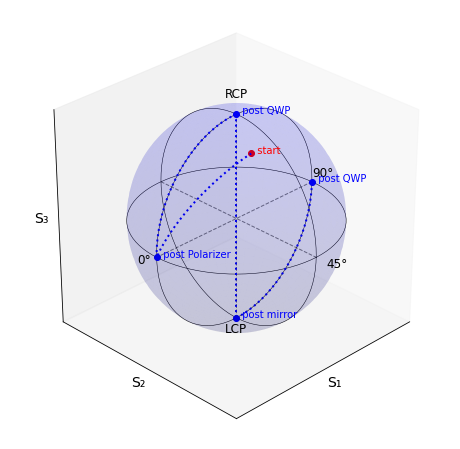

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
vis.draw_empty_sphere(ax)

# J1 = jones.field_elliptical(np.random.random()*np.pi,np.random.random()*2*np.pi)

J1 = jones.field_elliptical(np.pi/6,np.pi/6)

J2 = B @ J1
J3 = C @ J2
J4 = D @ J3
J5 = E @ J4

vis.draw_jones_poincare(J1, ax, label='  start', color='red')
vis.draw_jones_poincare(J2, ax, label='  post Polarizer', color='blue')
vis.draw_jones_poincare(J3, ax, label='  post QWP', color='blue')
vis.draw_jones_poincare(J4, ax, label='  post mirror', color='blue')
vis.draw_jones_poincare(J5, ax, label='  post QWP', color='blue')

vis.join_jones_poincare(J1, J2, ax, color='blue', lw=2, linestyle=':')
vis.join_jones_poincare(J2, J3, ax, color='blue', lw=2, linestyle=':')
vis.join_jones_poincare(J3, J4, ax, color='blue', lw=2, linestyle=':')
vis.join_jones_poincare(J4, J5, ax, color='blue', lw=2, linestyle=':')

plt.show()


In [7]:
?vis